In [1]:
# Load required modules

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Loading in train and test PTV_XL Data

ECG_PTBXL_train_df = pd.read_csv("./PTBXL/Train.csv")
ECG_PTBXL_test_df = pd.read_csv("./PTBXL/Test.csv")

In [3]:
ECG_PTBXL_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195752 entries, 0 to 195751
Columns: 200 entries, 0 to STTC
dtypes: float64(194), int64(5), object(1)
memory usage: 298.7+ MB


In [4]:
ECG_PTBXL_train_df.iloc[:, 195:200].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195752 entries, 0 to 195751
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   CD      195752 non-null  int64
 1   HYP     195752 non-null  int64
 2   MI      195752 non-null  int64
 3   NORM    195752 non-null  int64
 4   STTC    195752 non-null  int64
dtypes: int64(5)
memory usage: 7.5 MB


In [6]:
# Checking for empty values

ECG_PTBXL_train_df.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
CD      0
HYP     0
MI      0
NORM    0
STTC    0
Length: 200, dtype: int64

In [7]:
ECG_PTBXL_train_df.iloc[:, 195:200].value_counts()

CD  HYP  MI  NORM  STTC
0   0    0   1     0       77999
             0     1       24033
         1   0     0       23640
1   0    0   0     0       15541
         1   0     0       12664
0   1    0   0     1        7690
    0    1   0     1        5812
1   0    0   0     1        4762
0   1    0   0     0        4728
1   0    0   1     0        3471
0   1    1   0     1        3333
1   1    0   0     0        2826
    0    1   0     1        2278
    1    0   0     1        2023
0   1    1   0     0        1753
1   1    1   0     1        1536
                   0        1297
0   0    0   1     1         282
1   0    0   1     1          55
0   1    0   1     0          19
1   1    1   1     0          10
Name: count, dtype: int64

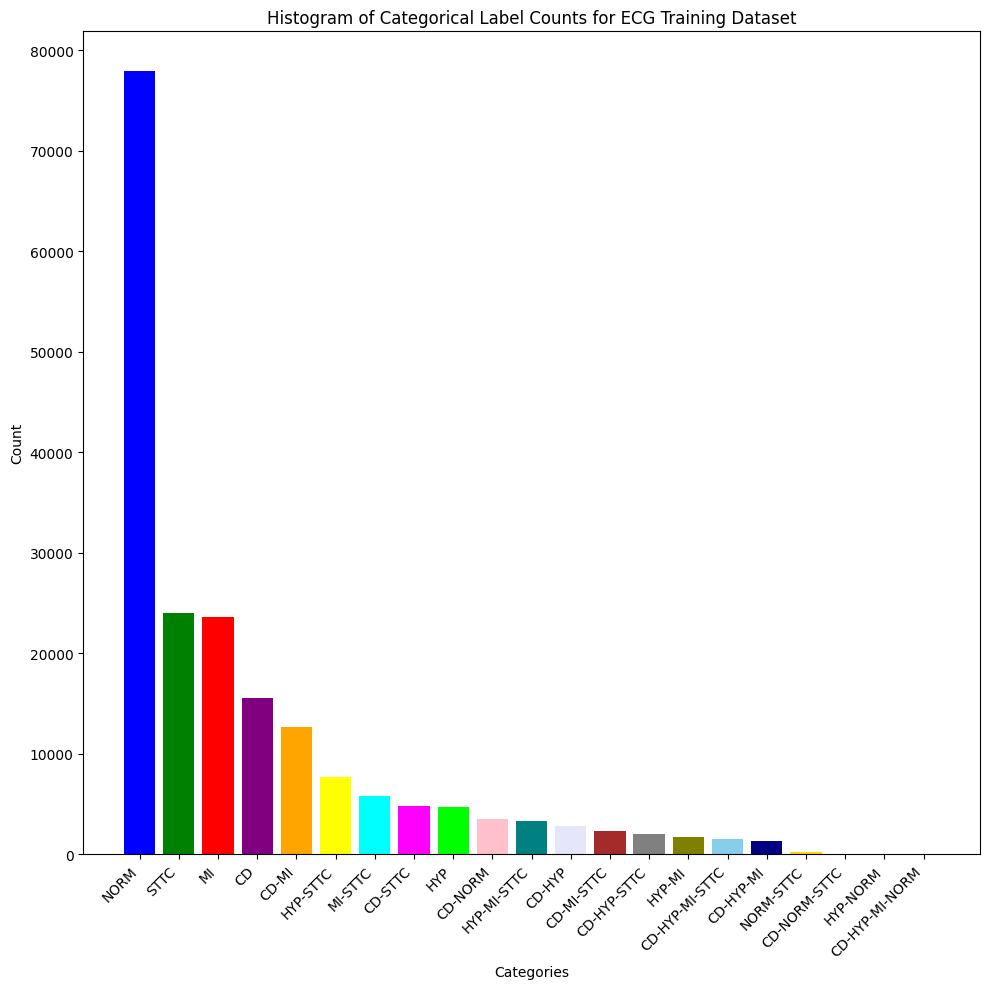

In [8]:
# Sample data
categories = ['NORM', 'STTC', 'MI', 'CD', 'CD-MI', 'HYP-STTC', 'MI-STTC', 'CD-STTC', 'HYP', 'CD-NORM', 'HYP-MI-STTC', 'CD-HYP', 'CD-MI-STTC', 'CD-HYP-STTC', 'HYP-MI', 'CD-HYP-MI-STTC', 'CD-HYP-MI', 'NORM-STTC', 'CD-NORM-STTC', 'HYP-NORM', 'CD-HYP-MI-NORM']
counts = ECG_PTBXL_train_df.iloc[:, 195:200].value_counts().values

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender', 'brown', 'gray', 'olive', 'skyblue', 'navy', 'gold', 'tan', 'orchid', 'salmon']

plt.figure(figsize=(10, 10))  # Adjust figure size
plot = plt.bar(categories, counts, color=colors)
plt.title('Histogram of Categorical Label Counts for ECG Training Dataset')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Count')
# Automatically adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

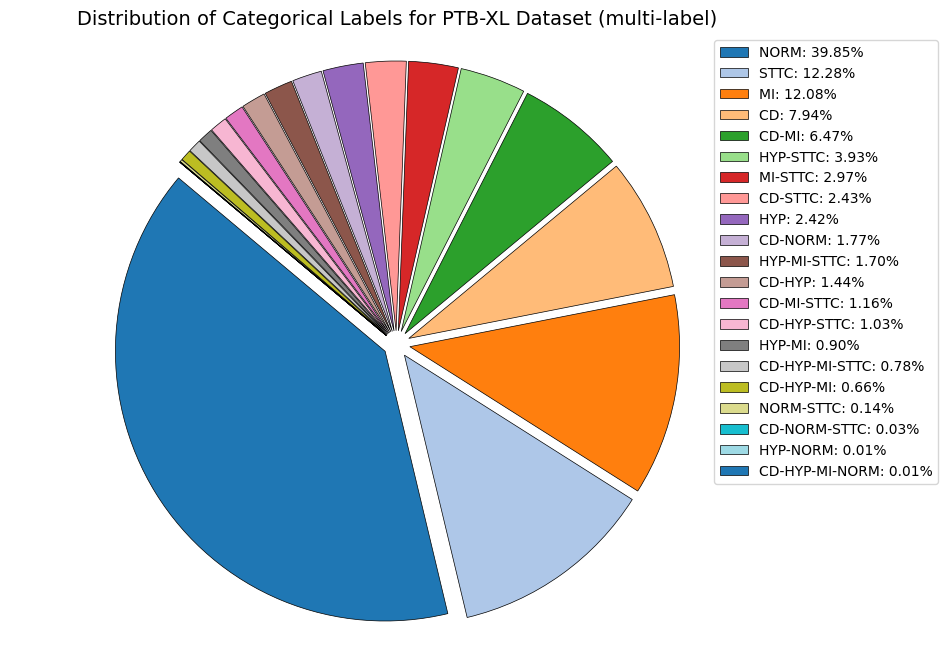

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['NORM', 'STTC', 'MI', 'CD', 'CD-MI', 'HYP-STTC', 'MI-STTC', 'CD-STTC', 'HYP', 'CD-NORM', 'HYP-MI-STTC', 'CD-HYP', 'CD-MI-STTC', 'CD-HYP-STTC', 'HYP-MI', 'CD-HYP-MI-STTC', 'CD-HYP-MI', 'NORM-STTC', 'CD-NORM-STTC', 'HYP-NORM', 'CD-HYP-MI-NORM']
counts = ECG_PTBXL_train_df.iloc[:, 195:200].value_counts().values
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# Define colors for each category
colors = plt.cm.tab20.colors[:len(categories)]

# Create pie chart
plt.figure(figsize=(10, 8))
explode = [0.05] * len(categories)  # Explode all slices
wedges, autotexts = plt.pie(counts, labels=None, startangle=140, pctdistance=0.85, colors=sns.color_palette("tab20"), textprops={'fontsize': 12}, explode=explode, wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'})

# Set aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Create legend with category names and percentages
legend_labels = [f'{category}: {percentage:.2f}%' for category, percentage in zip(categories, percentages)]
plt.legend(legend_labels, loc='upper left', fontsize=10, bbox_to_anchor=(0.9, 1))

# Set plot title
plt.title('Distribution of Categorical Labels for PTB-XL Dataset (multi-label)', fontsize=14)

# Show plot
plt.show()

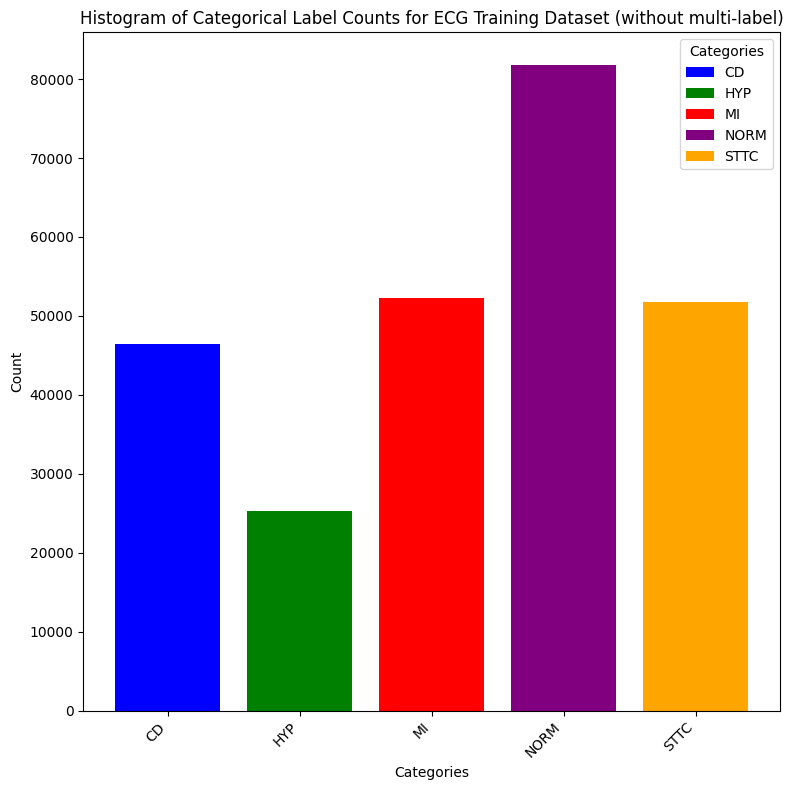

In [10]:
# Sample data
categories = ['CD', 'HYP', 'MI', 'NORM', 'STTC']
counts = [ECG_PTBXL_train_df.iloc[:, label].value_counts()[1] for label in [195, 196, 197, 198, 199]]

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(8, 8))  # Adjust figure size
plot = plt.bar(categories, counts, color=colors)
plt.title('Histogram of Categorical Label Counts for ECG Training Dataset (without multi-label)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Count')
# Automatically adjust layout to prevent overlapping
plt.tight_layout()
plt.legend(plot, categories, title='Categories', loc='upper right')

plt.show()

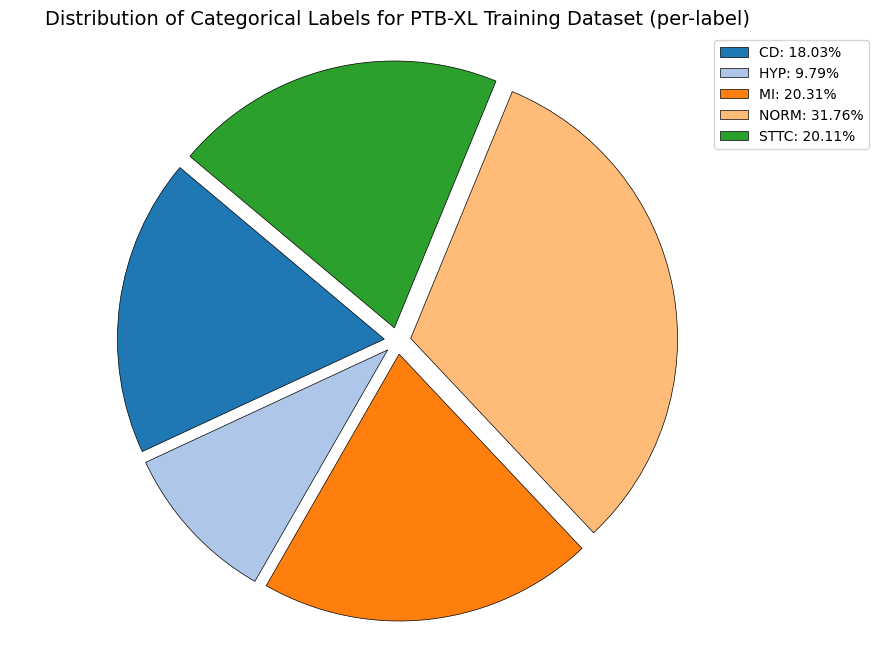

In [11]:
# Sample data
categories = ['CD', 'HYP', 'MI', 'NORM', 'STTC']
counts = [ECG_PTBXL_train_df.iloc[:, label].value_counts()[1] for label in [195, 196, 197, 198, 199]]
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# Define colors for each category
colors = plt.cm.tab20.colors[:len(categories)]

# Create pie chart
plt.figure(figsize=(10, 8))
explode = [0.05] * len(categories)  # Explode all slices
wedges, autotexts = plt.pie(counts, labels=None, startangle=140, pctdistance=0.85, colors=sns.color_palette("tab20"), textprops={'fontsize': 12}, explode=explode, wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'})

# Set aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Create legend with category names and percentages
legend_labels = [f'{category}: {percentage:.2f}%' for category, percentage in zip(categories, percentages)]
plt.legend(legend_labels, loc='upper left', fontsize=10, bbox_to_anchor=(0.9, 1))

# Set plot title
plt.title('Distribution of Categorical Labels for PTB-XL Training Dataset (per-label)', fontsize=14)

# Show plot
plt.show()